# Eksperimen SML - Christian Gideon Valent

Notebook ini berisi eksperimen untuk proyek Machine Learning dengan tahapan:
1. Perkenalan Dataset
2. Import Library
3. Memuat Dataset
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing

---
## 1. Perkenalan Dataset

Dataset yang digunakan adalah **Heart Disease Dataset** dari UCI Machine Learning Repository.

### Informasi Dataset:
- **Sumber**: UCI Machine Learning Repository
- **Jumlah Sampel**: ~303 (297 setelah handling missing values)
- **Jumlah Fitur**: 13 fitur
- **Task**: Binary Classification (Prediksi Penyakit Jantung)

### Deskripsi Fitur:
| No | Fitur | Deskripsi |
|----|-------|----------|
| 1 | `age` | Usia pasien (tahun) |
| 2 | `sex` | Jenis kelamin (1=laki-laki, 0=perempuan) |
| 3 | `cp` | Tipe nyeri dada (0-3) |
| 4 | `trestbps` | Tekanan darah istirahat (mm Hg) |
| 5 | `chol` | Kolesterol serum (mg/dl) |
| 6 | `fbs` | Gula darah puasa > 120 mg/dl (1=true, 0=false) |
| 7 | `restecg` | Hasil elektrokardiografi istirahat (0-2) |
| 8 | `thalach` | Detak jantung maksimum yang dicapai |
| 9 | `exang` | Angina yang diinduksi olahraga (1=yes, 0=no) |
| 10 | `oldpeak` | Depresi ST yang diinduksi oleh olahraga |
| 11 | `slope` | Kemiringan segmen ST puncak latihan |
| 12 | `ca` | Jumlah pembuluh darah utama (0-3) |
| 13 | `thal` | Thalassemia (0-3) |

### Target Classes:
- **0**: No Heart Disease (Tidak ada penyakit jantung)
- **1**: Heart Disease (Terdapat penyakit jantung)

---
## 2. Import Library

Library yang digunakan dalam eksperimen ini:

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Semua library berhasil diimpor!")

import os

✅ Semua library berhasil diimpor!


---
## 3. Memuat Dataset

Dataset Heart Disease dimuat dari UCI Repository atau file lokal.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan.

In [2]:
# URL dataset Heart Disease dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names sesuai dokumentasi UCI
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset
df = pd.read_csv(url, names=column_names, na_values='?')

# Handle missing values
df = df.dropna()

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = (df['target'] > 0).astype(int)

print("📊 Informasi Dataset:")
print("=" * 40)
print(f"Jumlah Sampel: {df.shape[0]}")
print(f"Jumlah Fitur: {df.shape[1] - 1}")
print(f"Target Classes: [0: No Disease, 1: Disease]")
print(f"Nama Fitur: {list(df.columns[:-1])}")

📊 Informasi Dataset:
Jumlah Sampel: 297
Jumlah Fitur: 13
Target Classes: [0: No Disease, 1: Disease]
Nama Fitur: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [3]:
print("📋 Preview Dataset (10 baris pertama):")
df.head(10)

📋 Preview Dataset (10 baris pertama):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


---
## 4. Exploratory Data Analysis (EDA)

Tahap ini melakukan analisis eksplorasi data untuk memahami karakteristik dataset.

### 4.1 Informasi Dasar Dataset

In [4]:
print("📊 Informasi Dataset:")
print("=" * 50)
df.info()

📊 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 33.6 KB


In [5]:
print("📈 Statistik Deskriptif:")
df.describe()

📈 Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### 4.2 Cek Missing Values dan Duplikat

In [6]:
print("🔍 Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing: {df.isnull().sum().sum()}")
print(f"\n🔍 Duplikat: {df.duplicated().sum()} baris")

🔍 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total Missing: 0

🔍 Duplikat: 0 baris


### 4.3 Distribusi Target

📊 Distribusi Target:
   0 (No Disease): 160 sampel (53.9%)
   1 (Disease):    137 sampel (46.1%)


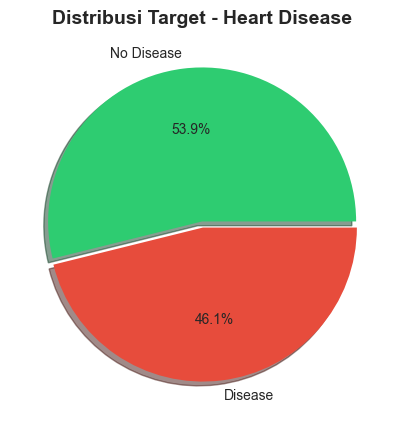

In [7]:
print("📊 Distribusi Target:")
target_counts = df['target'].value_counts()
print(f"   0 (No Disease): {target_counts[0]} sampel ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   1 (Disease):    {target_counts[1]} sampel ({target_counts[1]/len(df)*100:.1f}%)")

# Visualisasi
plt.figure(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
plt.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
        colors=colors, explode=[0.02, 0.02], shadow=True)
plt.title('Distribusi Target - Heart Disease', fontsize=14, fontweight='bold')
plt.show()

### 4.4 Distribusi Fitur Numerik

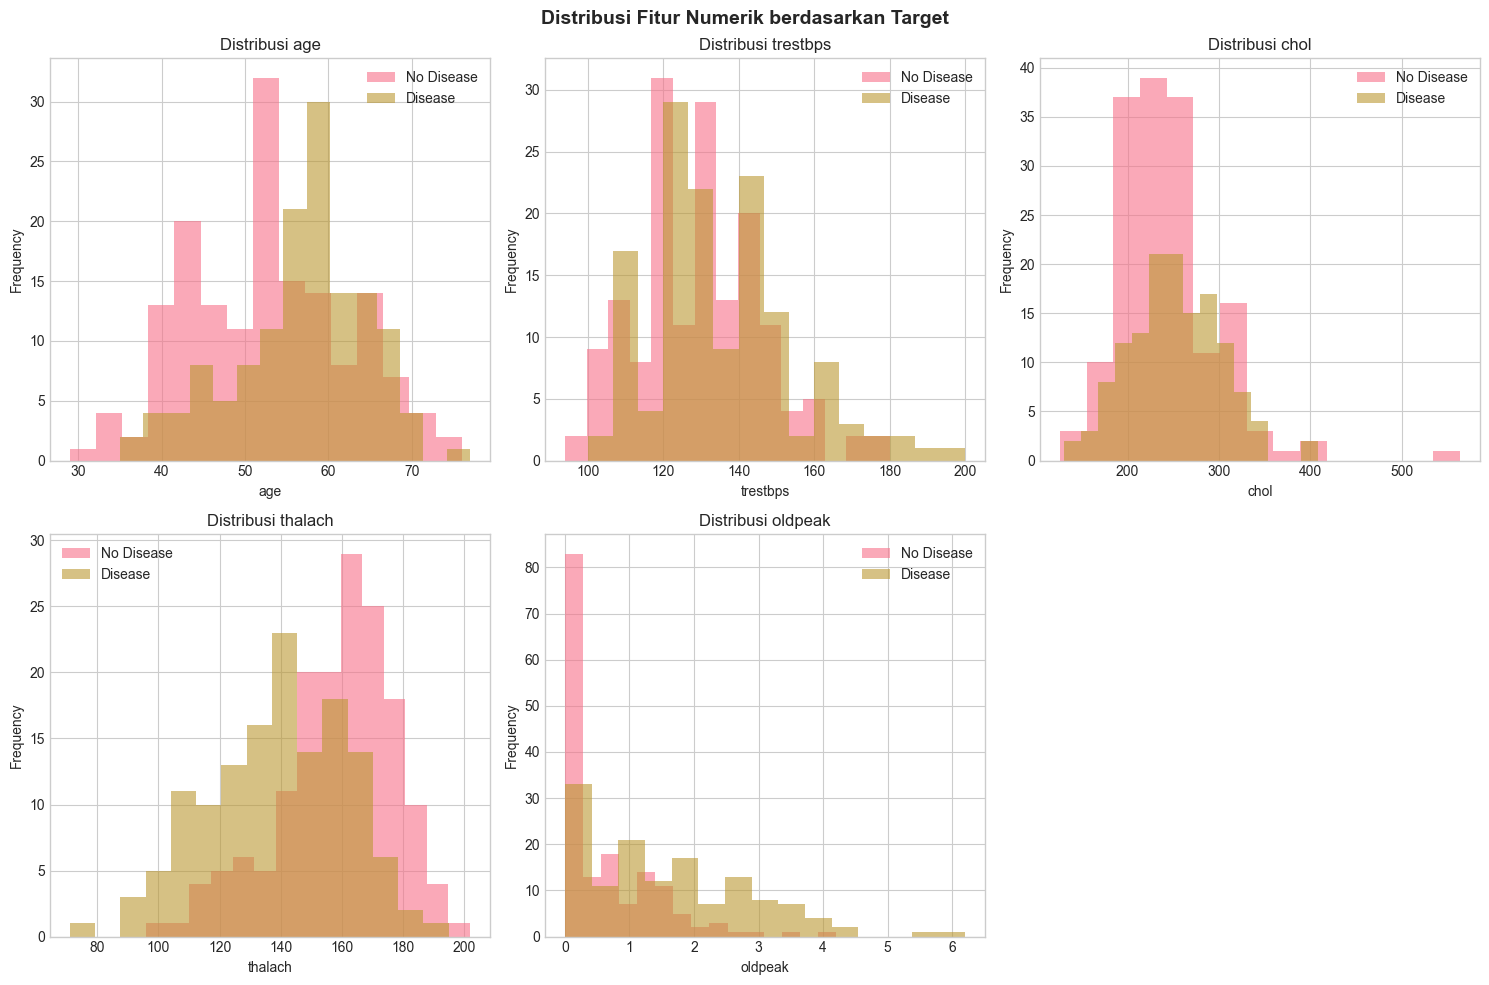

In [8]:
# Fitur numerik untuk visualisasi
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    for target in [0, 1]:
        data = df[df['target'] == target][feature]
        label = 'No Disease' if target == 0 else 'Disease'
        ax.hist(data, alpha=0.6, label=label, bins=15)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribusi {feature}')
    ax.legend()

# Hide empty subplot
axes[-1].set_visible(False)

plt.suptitle('Distribusi Fitur Numerik berdasarkan Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.5 Korelasi Antar Fitur

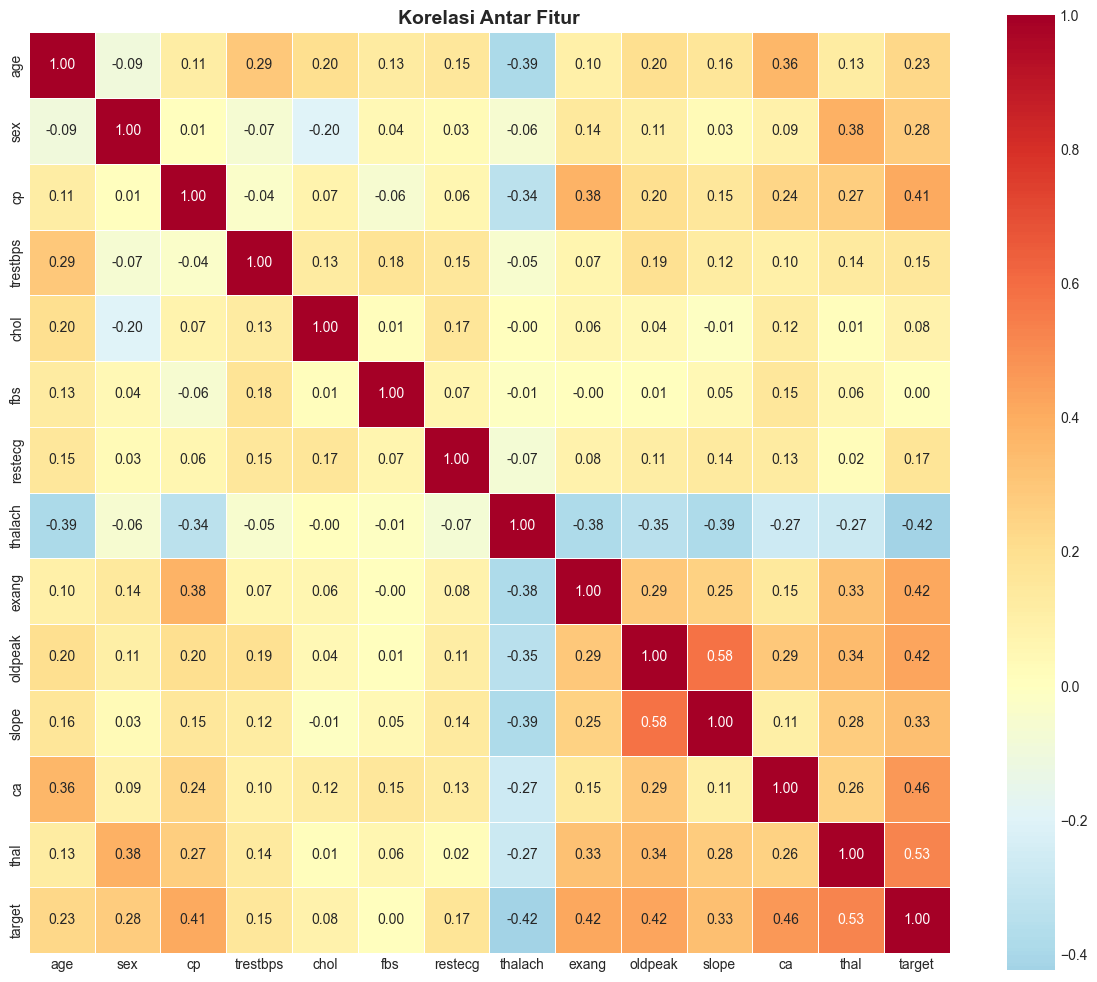

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 5. Data Preprocessing

Tahap preprocessing mencakup:
1. Memisahkan fitur dan target
2. Train-test split
3. Feature scaling

### 5.1 Memisahkan Fitur dan Target

In [10]:
# Definisikan fitur dan target
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = df[feature_cols]
y = df['target']

print("✅ Fitur dan Target berhasil dipisahkan!")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")

✅ Fitur dan Target berhasil dipisahkan!
   X shape: (297, 13)
   y shape: (297,)


### 5.2 Train-Test Split

In [11]:
# Split data dengan stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("✅ Data berhasil di-split!")
print(f"   Training set: {X_train.shape[0]} sampel (80%)")
print(f"   Testing set: {X_test.shape[0]} sampel (20%)")

# Verifikasi stratified split
print(f"\n📊 Distribusi Target setelah split:")
print(f"   Train - No Disease: {(y_train == 0).sum()}, Disease: {(y_train == 1).sum()}")
print(f"   Test  - No Disease: {(y_test == 0).sum()}, Disease: {(y_test == 1).sum()}")

✅ Data berhasil di-split!
   Training set: 237 sampel (80%)
   Testing set: 60 sampel (20%)

📊 Distribusi Target setelah split:
   Train - No Disease: 128, Disease: 109
   Test  - No Disease: 32, Disease: 28


### 5.3 Feature Scaling

In [12]:
# Scaling menggunakan StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=feature_cols,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=feature_cols,
    index=X_test.index
)

print("✅ Feature Scaling selesai (StandardScaler)!")
print(f"   Mean setelah scaling (train): {X_train_scaled.mean().mean():.6f}")
print(f"   Std setelah scaling (train): {X_train_scaled.std().mean():.6f}")

✅ Feature Scaling selesai (StandardScaler)!
   Mean setelah scaling (train): -0.000000
   Std setelah scaling (train): 1.002116


In [13]:
print("📋 Preview Data Setelah Scaling:")
X_train_scaled.head()

📋 Preview Data Setelah Scaling:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
55,-0.085668,0.693722,0.853348,-0.462582,0.312737,-0.450606,1.023523,-1.827448,1.374861,0.967117,0.672972,0.349404,1.131548
160,-0.973247,0.693722,-1.242439,-1.749078,-0.987921,2.219234,-0.989547,0.275439,-0.727346,-0.901878,-0.954521,-0.740185,1.131548
178,-1.306090,0.693722,-0.194546,-0.126974,1.236393,-0.450606,-0.989547,0.543892,-0.727346,0.712254,-0.954521,0.349404,-0.931351
86,-0.862300,0.693722,-0.194546,0.320503,0.143086,-0.450606,1.023523,0.275439,-0.727346,-0.901878,-0.954521,-0.740185,-0.931351
79,0.358121,0.693722,0.853348,0.991719,0.388137,-0.450606,1.023523,-1.737964,1.374861,-0.222243,-0.954521,-0.740185,1.131548


In [14]:
# Buat direktori output jika belum ada
output_dir = 'heart_preprocessing'
os.makedirs(output_dir, exist_ok=True)

# Gabungkan fitur dan target untuk disimpan
train_data = X_train_scaled.copy()
train_data['target'] = y_train.values

test_data = X_test_scaled.copy()
test_data['target'] = y_test.values

# Simpan ke file CSV
train_path = os.path.join(output_dir, 'train_data.csv')
test_path = os.path.join(output_dir, 'test_data.csv')

train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)

# Simpan scaler juga
import joblib
scaler_path = os.path.join(output_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)

print("=" * 60)
print("✅ HASIL PREPROCESSING BERHASIL DISIMPAN!")
print("=" * 60)
print(f"\n📁 Output Directory: {output_dir}")
print(f"   ├── train_data.csv ({train_data.shape[0]} sampel)")
print(f"   ├── test_data.csv ({test_data.shape[0]} sampel)")
print(f"   └── scaler.pkl (StandardScaler)")

✅ HASIL PREPROCESSING BERHASIL DISIMPAN!

📁 Output Directory: heart_preprocessing
   ├── train_data.csv (237 sampel)
   ├── test_data.csv (60 sampel)
   └── scaler.pkl (StandardScaler)


---
## Ringkasan Preprocessing

| Tahap | Status |
|-------|--------|
| Dataset | Heart Disease (UCI) |
| Jumlah Sampel | 297 |
| Jumlah Fitur | 13 |
| Missing Values | 0 (sudah di-handle) |
| Train-Test Split | 80%-20% (stratified) |
| Scaling | StandardScaler |

In [15]:
print("="*60)
print("✅ PREPROCESSING SELESAI!")
print("="*60)
print(f"\n📊 Ringkasan:")
print(f"   - Dataset: Heart Disease (UCI)")
print(f"   - Sampel: {len(df)}")
print(f"   - Fitur: {len(feature_cols)}")
print(f"   - Training: {len(X_train)} sampel")
print(f"   - Testing: {len(X_test)} sampel")
print(f"\n📁 Output tersimpan di folder: heart_preprocessing/")
print(f"   - train_data.csv")
print(f"   - test_data.csv")
print(f"   - scaler.pkl")

✅ PREPROCESSING SELESAI!

📊 Ringkasan:
   - Dataset: Heart Disease (UCI)
   - Sampel: 297
   - Fitur: 13
   - Training: 237 sampel
   - Testing: 60 sampel

📁 Output tersimpan di folder: heart_preprocessing/
   - train_data.csv
   - test_data.csv
   - scaler.pkl
